In [83]:
import numpy as np
import matplotlib.pyplot as plt

name_str='frequency130sample{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0.001, 0.006, 0.001)
axis_std_w2 = np.arange(0.001, 0.006, 0.001)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,5,5))
test_accuracy_10_samples = np.zeros((10,5,5))


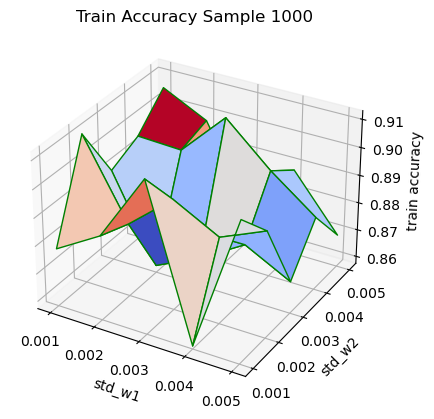

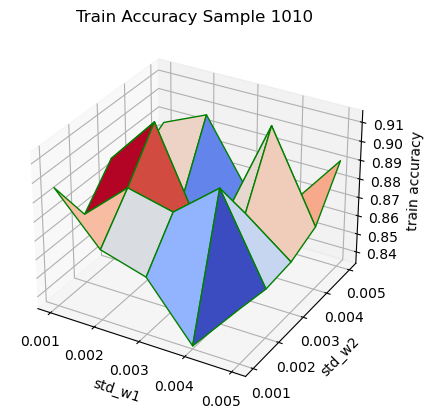

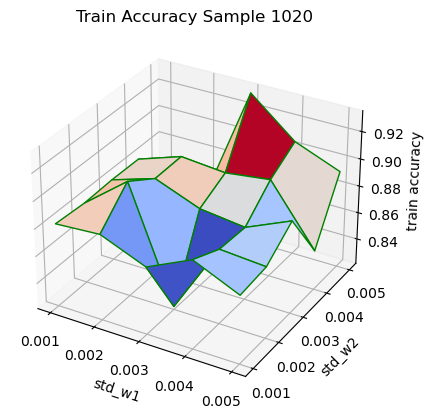

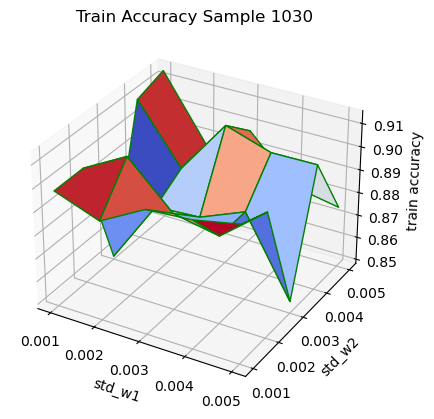

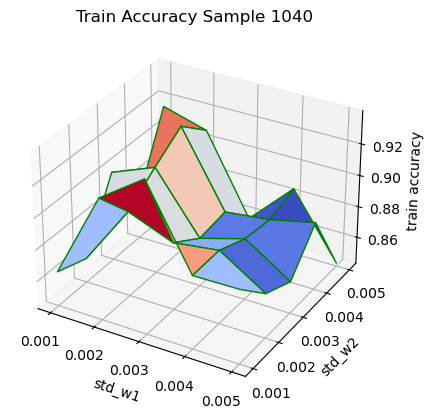

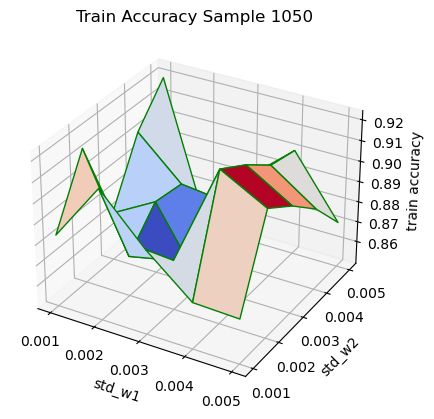

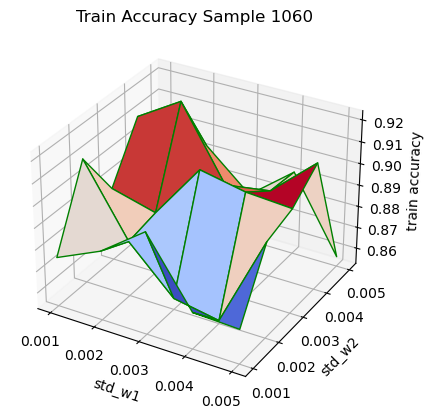

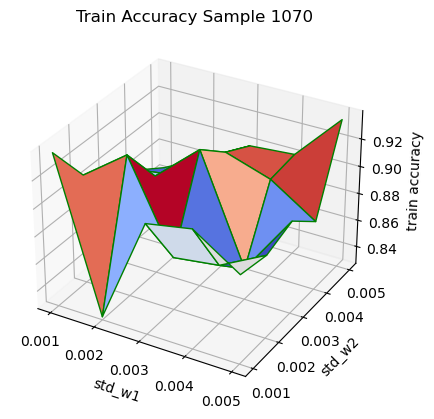

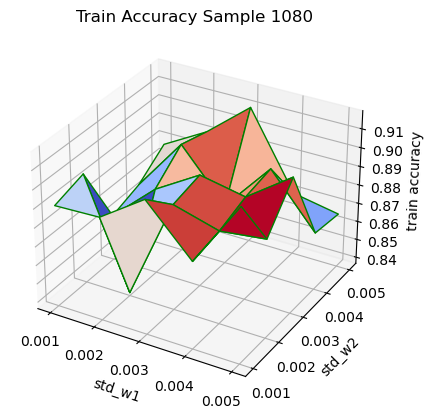

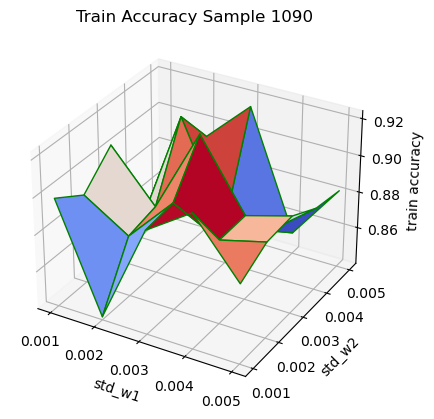

In [84]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['train_accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('train accuracy')
    ax.set_title('Train Accuracy Sample {}'.format(sample))
    fig.savefig("train_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            train_accuracy_10_samples[i][j][k]= data['train_accuracy_w1_w2'][j][k]

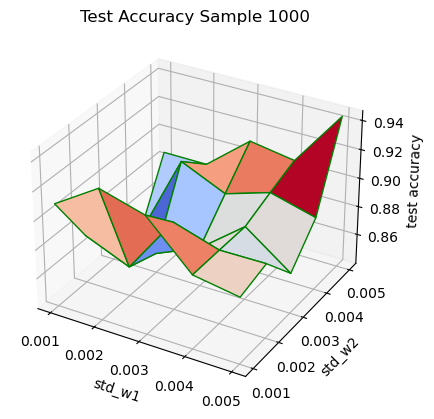

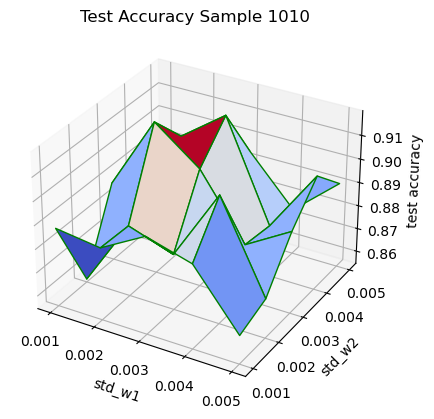

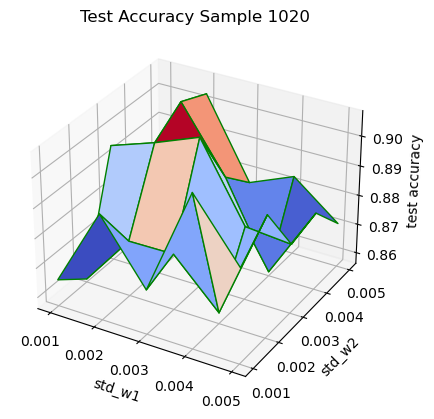

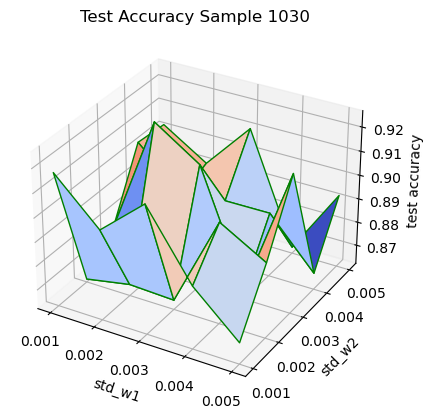

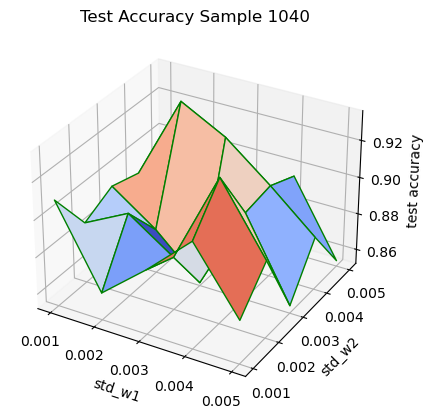

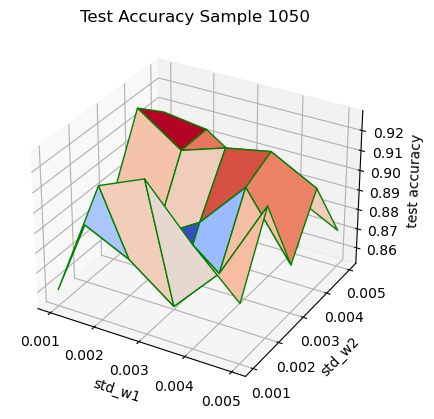

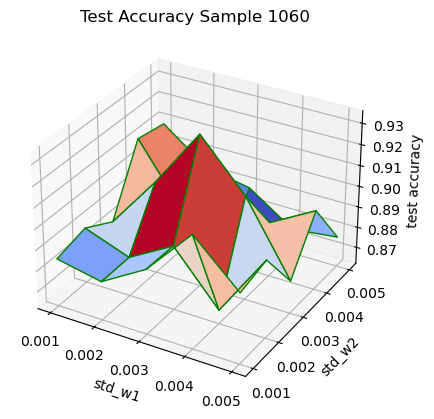

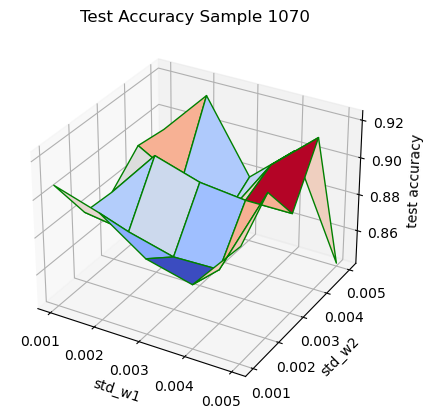

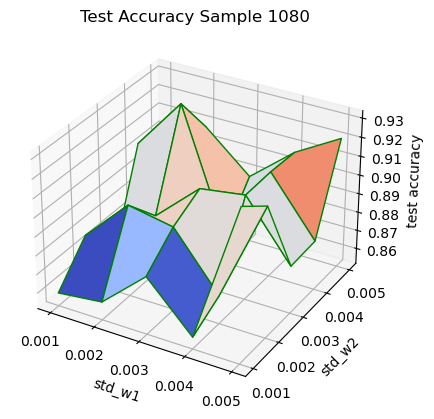

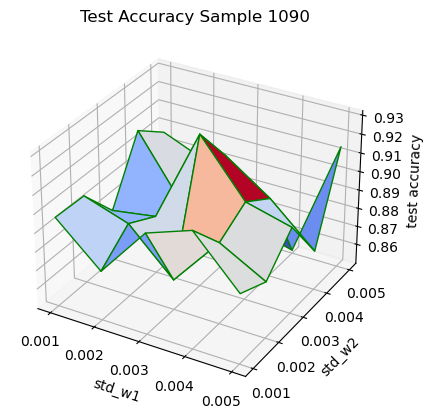

In [85]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['test_accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('test accuracy')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [86]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
average_train_accuracy_grid_10_by_10_10_samples

array([[0.8906033 , 0.89333267, 0.88163228, 0.88365552, 0.88899573],
       [0.88122663, 0.88737981, 0.88774706, 0.89532585, 0.88459702],
       [0.89871628, 0.87693977, 0.88669705, 0.88541834, 0.88982372],
       [0.88210971, 0.88635984, 0.88453693, 0.89412894, 0.88357706],
       [0.88691907, 0.88781217, 0.88348691, 0.8820396 , 0.87840378]])

In [87]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
average_test_accuracy_grid_10_by_10_10_samples

array([[0.88974359, 0.87579127, 0.87888622, 0.89366987, 0.89313902],
       [0.89085537, 0.88001803, 0.89190705, 0.90065104, 0.89802684],
       [0.8979367 , 0.87784455, 0.89955929, 0.89196715, 0.88644832],
       [0.89505208, 0.88694912, 0.89408053, 0.89291867, 0.88358373],
       [0.88859175, 0.89810697, 0.88349359, 0.89005409, 0.88801082]])

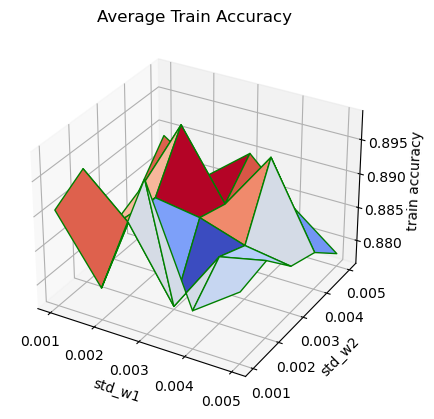

In [88]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_train_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('train accuracy')
ax.set_title('Average Train Accuracy')
fig.savefig("average_train_accuracy_grid_over_10_samples.png".format(sample))


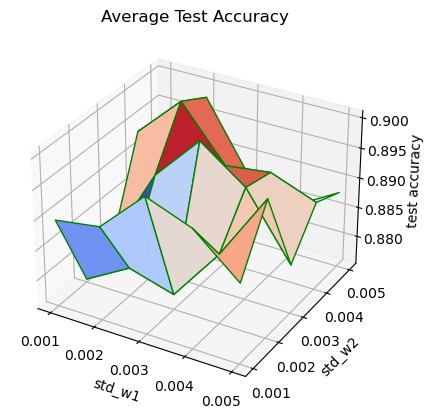

In [89]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('test accuracy')
ax.set_title('Average Test Accuracy')
fig.savefig("average_test_accuracy_grid_over_10_samples.png".format(sample))

In [90]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [91]:
best_w1_w2

(2, 0)

In [92]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [93]:
test_best_w1_w2

(1, 3)

In [94]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [95]:
average_train_accuracy_grid_10_by_10_10_samples[0]

array([0.8906033 , 0.89333267, 0.88163228, 0.88365552, 0.88899573])

In [96]:
average_train_accuracy_grid_10_by_10_10_samples[:,2]

array([0.88163228, 0.88774706, 0.88669705, 0.88453693, 0.88348691])

In [97]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_train_accuracy_grid_10_by_10_10_samples[2])
std_dev_w2 = np.std(average_train_accuracy_grid_10_by_10_10_samples[:,0])

In [98]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
test_std_dev_w1 = np.std(average_test_accuracy_grid_10_by_10_10_samples[1])
test_std_dev_w2 = np.std(average_test_accuracy_grid_10_by_10_10_samples[:,3])

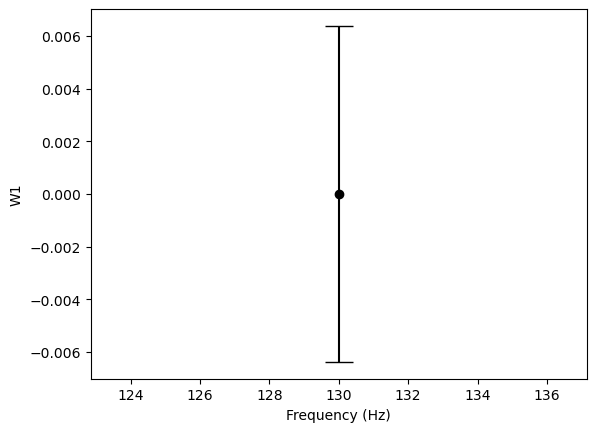

In [99]:
fig2, ax2 = plt.subplots()
ax2.scatter(130, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(130, array_best_w1_best_w2[1]/0.3445, std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W1")
fig2.savefig("train_accuracy_frequency130forW1.png")

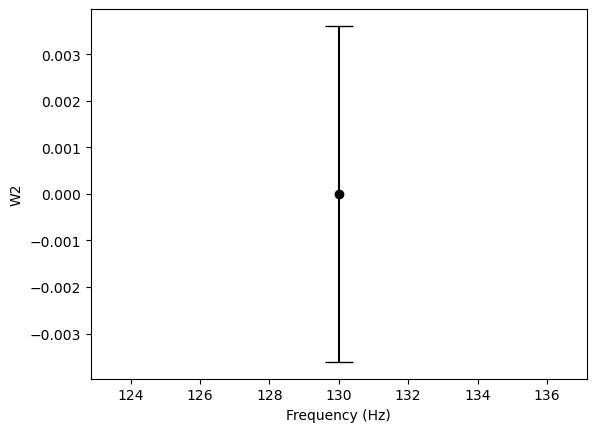

In [100]:
fig2, ax2 = plt.subplots()
ax2.scatter(130, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(130, array_best_w1_best_w2[1]/0.3445, test_std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W2")
fig2.savefig("train_accuracy_frequency130forW2.png")

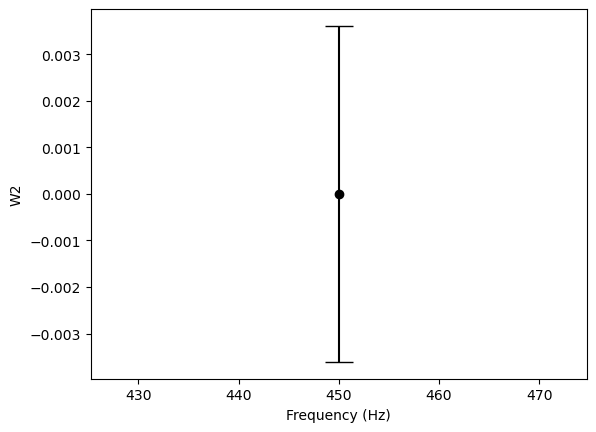

In [101]:
fig2, ax2 = plt.subplots()
ax2.scatter(450, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(450, array_best_w1_best_w2[1]/0.3445, test_std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("W2")
fig2.savefig("train_accuracy_frequency130forW2.png")

In [102]:
data = {}
data['frequency'] = 130
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2
np.savez("train_accuracy_130_frequency_neurons_w1_w2.npz",**data)

In [103]:
data = {}
data['frequency'] = 130
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = test_std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = test_std_dev_w2
np.savez("test_accuracy_130_frequency_neurons_w1_w2.npz",**data)